In [117]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import random

In [2]:
IN_GRAPH_PATH = "/shared/3/projects/newsDiffusion/data/interim/NEREmbedding/graph2020_2_1000_8.pkl"

In [3]:
#load in full graph (edges >= .85 similarity)
graph = nx.read_edgelist(IN_GRAPH_PATH)

In [4]:
#generate connected component subgraphs 
compGraphs = [graph.subgraph(c).copy() for c in nx.connected_components(graph)]

In [5]:
print("Number of story clusters: " + str(len(compGraphs)))

Number of story clusters: 195738


In [6]:
storySizeList = [nx.number_of_nodes(component) for component in compGraphs]

In [15]:
print("Story cluster size statistics: ")
print("min: " + str(min(storySizeList)))
print("max: " + str(max(storySizeList)))
print("median: " + str(np.median(storySizeList)))
print("mean: " + str(np.mean(storySizeList)))
print("25th, 50th, 75th, 90th and 95th percentiles: " + str(np.percentile(storySizeList, [25, 50, 75, 90, 95])))

Story cluster size statistics: 
min: 2
max: 290263
median: 2.0
mean: 6.203445421941575
25th, 50th, 75th, 90th and 95th percentiles: [ 2.  2.  4.  7. 11.]


Text(0, 0.5, '# of story clusters')

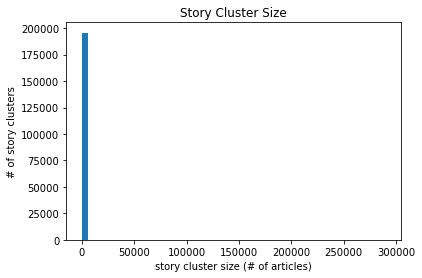

In [12]:
nodeSizeList = [int(nx.number_of_nodes(component)) for component in compGraphs]
plt.hist(nodeSizeList, bins=50)
plt.title("Story Cluster Size")
plt.xlabel("story cluster size (# of articles)")
plt.ylabel("# of story clusters")

In [47]:
plt.rcParams["figure.dpi"] = 120

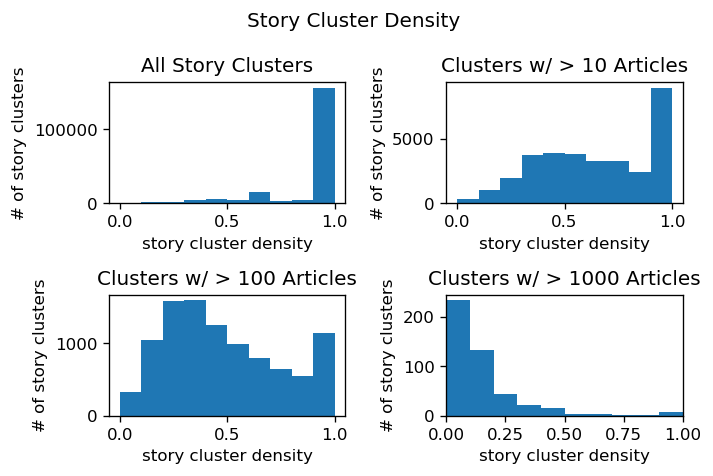

In [74]:
fig, ax = plt.subplots(2, 2, figsize=(6, 4))
#story cluster density 
#i.e. how close is the graph to being complete 
densityList = [nx.density(component) for component in compGraphs]
ax[0,0].hist(densityList)
ax[0,0].set_xlabel("story cluster density")
ax[0,0].set_ylabel("# of story clusters")
ax[0,0].set_title("All Story Clusters")

densityList = [nx.density(component) for component in compGraphs if nx.number_of_nodes(component) > 4]
ax[0,1].hist(densityList)
ax[0,1].set_xlabel("story cluster density")
ax[0,1].set_ylabel("# of story clusters")
ax[0,1].set_title("Clusters w/ > 10 Articles")

densityList = [nx.density(component) for component in compGraphs if nx.number_of_nodes(component) > 10]
ax[1,0].hist(densityList)
ax[1,0].set_xlabel("story cluster density")
ax[1,0].set_ylabel("# of story clusters")
ax[1,0].set_title("Clusters w/ > 100 Articles")

densityList = [nx.density(component) for component in compGraphs if nx.number_of_nodes(component) > 100]
ax[1,1].hist(densityList)
ax[1,1].set_xlabel("story cluster density")
ax[1,1].set_ylabel("# of story clusters")
ax[1,1].set_title("Clusters w/ > 1000 Articles")
ax[1,1].set_xlim(0, 1)

plt.suptitle("Story Cluster Density")
plt.tight_layout()

Text(0.5, 1.0, 'Story Cluster Density vs. Story Cluster Size')

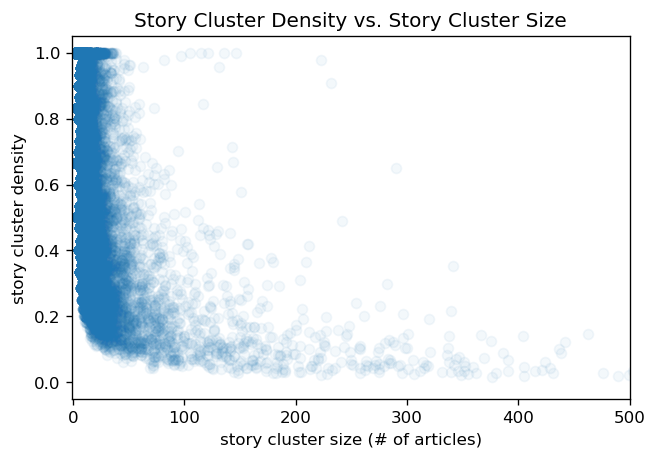

In [55]:
densityList = [nx.density(component) for component in compGraphs]
plt.scatter(nodeSizeList, densityList, alpha=.05)
#plt.xticks(np.arange(0, 22, 2))
plt.xlabel("story cluster size (# of articles)")
plt.ylabel("story cluster density")
plt.xlim(-1, 500)
plt.title("Story Cluster Density vs. Story Cluster Size")

In [56]:
np.corrcoef([nodeSizeList, densityList])

array([[ 1.        , -0.02207361],
       [-0.02207361,  1.        ]])

100%|██████████| 195738/195738 [00:00<00:00, 2289263.06it/s]


In [72]:
len([component for component in compGraphs if nx.number_of_nodes(component) > 300])

110

In [76]:
#we want to get the average clustering coefficient 
allClusts = []
over4 = []
over10 = []
over100 = []
for component in tqdm(compGraphs): 
    clusterSize = nx.number_of_nodes(component)
    if clusterSize <= 300: 
        coeff = nx.average_clustering(component)
        
        allClusts.append(coeff)
        if clusterSize > 4: 
            over4.append(coeff)
        if clusterSize > 10: 
            over10.append(coeff)
        if clusterSize > 100: 
            over100.append(coeff)
            

100%|██████████| 195738/195738 [00:36<00:00, 5315.14it/s] 


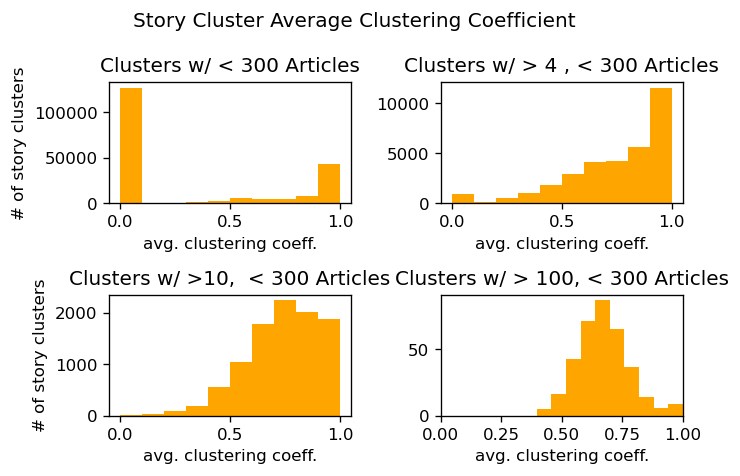

In [81]:
color = "orange"
fig, ax = plt.subplots(2, 2, figsize=(6, 4))
#story cluster density 
#i.e. how close is the graph to being complete 
ax[0,0].hist(allClusts, color=color)
ax[0,0].set_xlabel("avg. clustering coeff.")
ax[0,0].set_ylabel("# of story clusters")
ax[0,0].set_title("Clusters w/ <= 300 Articles")


ax[0,1].hist(over4, color=color)
ax[0,1].set_xlabel("avg. clustering coeff.")
#ax[0,1].set_ylabel("# of story clusters")
ax[0,1].set_title("Clusters w/ > 4 , <= 300 Articles")


ax[1,0].hist(over10, color=color)
ax[1,0].set_xlabel("avg. clustering coeff.")
ax[1,0].set_ylabel("# of story clusters")
ax[1,0].set_title("Clusters w/ >10,  <= 300 Articles")


ax[1,1].hist(over100, color=color)
ax[1,1].set_xlabel("avg. clustering coeff.")
#ax[1,1].set_ylabel("# of story clusters")
ax[1,1].set_title("Clusters w/ > 100, <=300 Articles")
ax[1,1].set_xlim(0, 1)

plt.suptitle("Story Cluster Average Clustering Coefficient")
plt.tight_layout()

In [82]:
nodeSizeList = [int(nx.number_of_nodes(component)) for component in compGraphs if int(nx.number_of_nodes(component)) <= 300]

Text(0.5, 1.0, 'Avg. Cluster Coefficient vs. Story Cluster Size')

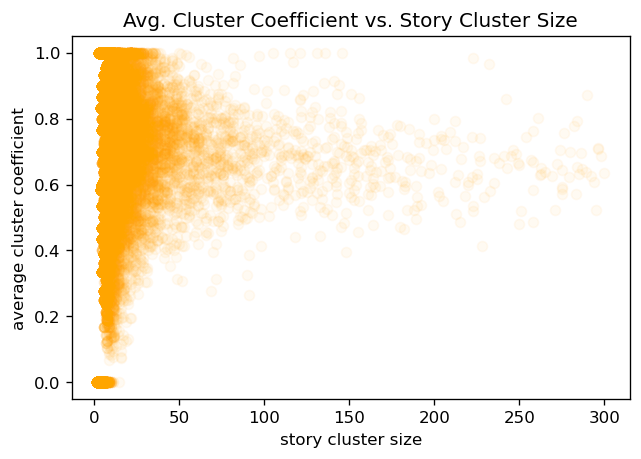

In [86]:
plt.scatter(nodeSizeList, allClusts, alpha=.05, color="orange")
#plt.xticks(np.arange(0, 22, 2))
plt.xlabel("story cluster size")
plt.ylabel("average cluster coefficient")
plt.title("Avg. Cluster Coefficient vs. Story Cluster Size")

Text(0.5, 1.0, 'Story Cluster Transitivies')

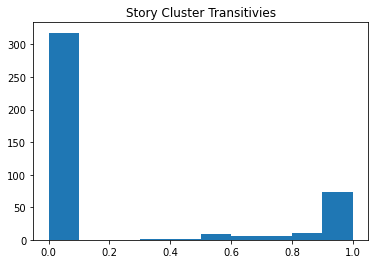

In [46]:
#we want to get the average clustering coefficient 
transitivities = [nx.transitivity(component) for component in compGraphs]
plt.hist(transitivities)
plt.title("Story Cluster Transitivies")

Text(0.5, 1.0, 'Transitivies vs. Story Cluster Size')

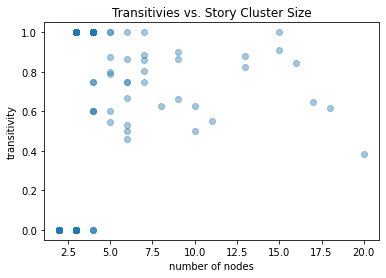

In [47]:
plt.scatter(nodeSizeList, transitivities, alpha=.4)
#plt.xticks(np.arange(0, 22, 2))
plt.xlabel("number of nodes")
plt.ylabel("transitivity")
plt.title("Transitivies vs. Story Cluster Size")

In [ ]:
#important to note, we really shouldn't have 
#hardly any articles where its neighbors aren't mostly connected to eachother
#so look for low clustering coefficients 

In [91]:
comp = nx.bridges(compGraphs[5])
len(list(comp))

1

In [105]:
#bridges are a main concern. 
#We wouldn't want to bring connected components together by only a single article 
#bridges = [len(list(nx.bridges(component))) for component in compGraphs]
allClusts = []
over4 = []
over10 = []
over100 = []

bridgeCounts = []
for component in tqdm(compGraphs): 
    if nx.number_of_nodes(component) <= 300: 
        bridges = len(list(nx.bridges(component)))
        clusterSize = nx.number_of_nodes(component)
        
        allClusts.append(bridges)
        if clusterSize > 4: 
            over2.append(bridges)
        if clusterSize > 10: 
            over4.append(bridges)
        if clusterSize > 100: 
            over100.append(bridges)

100%|██████████| 195738/195738 [00:27<00:00, 7117.89it/s] 


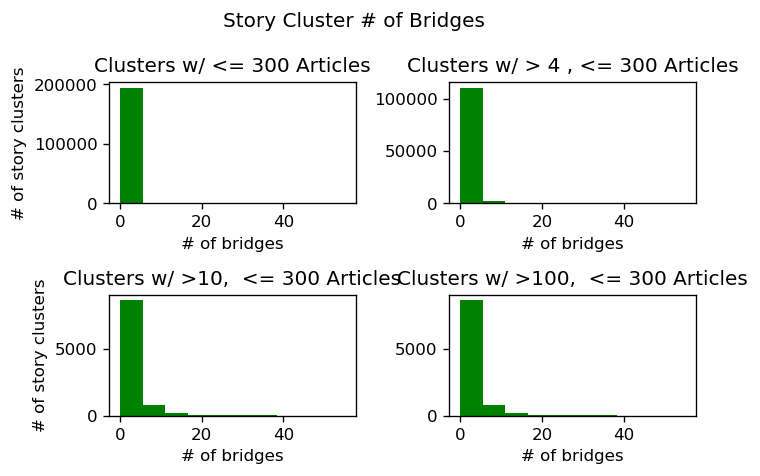

In [107]:
color = "green"
fig, ax = plt.subplots(2, 2, figsize=(6, 4))
#story cluster density 
#i.e. how close is the graph to being complete 
ax[0,0].hist(allClusts, color=color)
ax[0,0].set_xlabel("# of bridges")
ax[0,0].set_ylabel("# of story clusters")
ax[0,0].set_title("Clusters w/ <= 300 Articles")


ax[0,1].hist(over2, color=color)
ax[0,1].set_xlabel("# of bridges")
#ax[0,1].set_ylabel("# of story clusters")
ax[0,1].set_title("Clusters w/ > 4 , <= 300 Articles")


ax[1,0].hist(over4, color=color)
ax[1,0].set_xlabel("# of bridges")
ax[1,0].set_ylabel("# of story clusters")
ax[1,0].set_title("Clusters w/ >10,  <= 300 Articles")

ax[1,1].hist(over4, color=color)
ax[1,1].set_xlabel("# of bridges")
ax[1,1].set_title("Clusters w/ >100,  <= 300 Articles")

plt.suptitle("Story Cluster # of Bridges")
plt.tight_layout()

In [ ]:
nodeSizeList = [int(nx.number_of_nodes(component)) for component in compGraphs if int(nx.number_of_nodes(component)) <= 300]

Text(0.5, 1.0, '# of Bridges vs. Story Cluster Size')

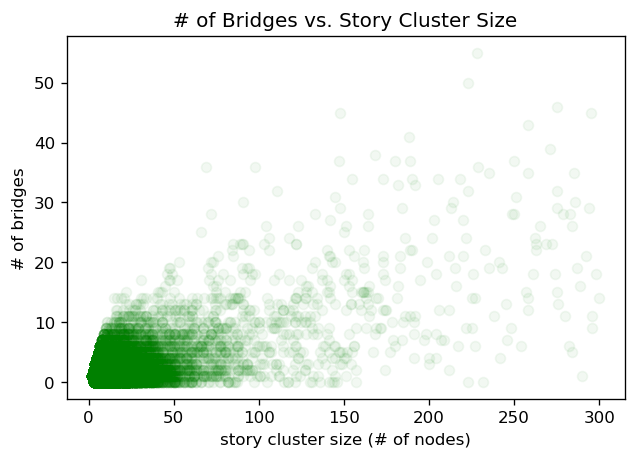

In [111]:
plt.scatter(nodeSizeList, allClusts, alpha=.05, color=color)
plt.xlabel("story cluster size (# of nodes)")
plt.ylabel("# of bridges")
plt.title("# of Bridges vs. Story Cluster Size")

In [119]:
#actually look at some of the graphs 
#get component graphs that are visualizeable 
midSizeClusts = [subGraph for subGraph in compGraphs if nx.number_of_nodes(subGraph) < 30 and nx.number_of_nodes(subGraph) < 30]

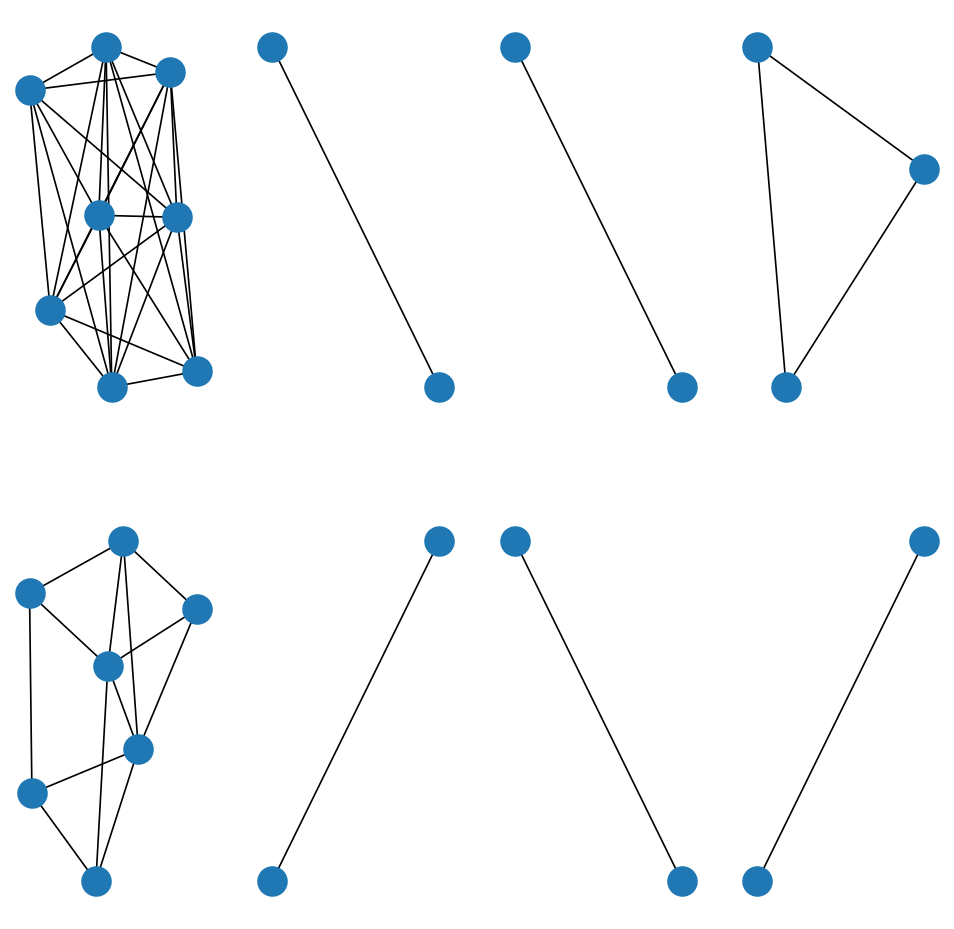

In [142]:
rows = 2
cols = 4
fig, ax = plt.subplots(rows, cols, figsize=(10, 10))
sampledClusts = random.sample(midSizeClusts, 8)


clustCount = 0
for row in range(0, rows): 
    for col in range(0, cols): 
        
        sampleClust = sampledClusts[clustCount]
        nx.draw(sampleClust, ax=ax[row, col])
        clustCount += 1


In [138]:
ax[0,0]

<AxesSubplot:>

TypeError: draw() missing 1 required positional argument: 'G'

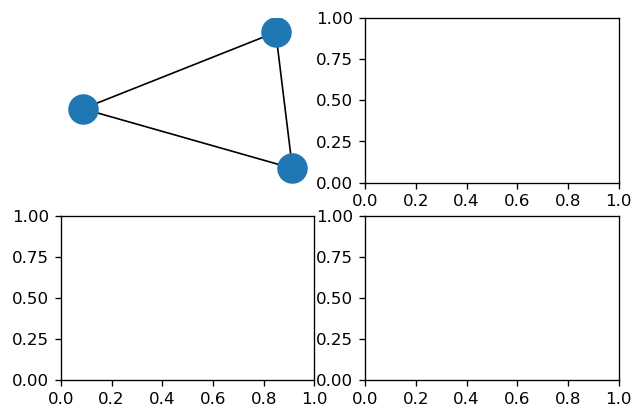

In [133]:
fig, ax = plt.subplots(2,2)
nx.draw(sampleClust, ax=ax[0,0])
plt.draw()